In [1]:
import numpy as np
import pandas as pd

def generate_synthetic_data(filename,num_students = 1000):
  np.random.seed(182)
  hours_studied = np.random.uniform(1,10,num_students)
  attendence = np.random.uniform(50,100,num_students)
  previous_score = np.random.uniform(40,90,num_students)
  final_score = (1.44*hours_studied + 2.71 * attendence + 7.32 * previous_score + np.random.normal(0,5,num_students)) % 100
  df = pd.DataFrame({
      "hours_studied" : hours_studied,
      "attendence" : attendence,
      "previous_score" : previous_score,
      "final_score" : final_score
  })
  df.to_csv(filename,index = False)

generate_synthetic_data("student_data.csv",1500)

In [2]:
df = pd.read_csv("student_data.csv")
df.describe()

,hours_studied,attendence,previous_score,final_score
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,5.589447,75.426357,65.617117,49.470897
std,2.674024,14.538970,14.231917,28.589433
min,1.003848,50.015690,40.020155,0.009945
25%,3.224090,62.622779,53.331395,24.423400
50%,5.692936,75.556062,66.205013,49.792718
75%,7.951591,88.005674,77.794433,74.148127
max,9.989097,99.981243,89.986496,99.947303


In [3]:
from sklearn.model_selection import train_test_split
X = df[['hours_studied','attendence','previous_score']]
y = df['final_score']

X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 231)

In [4]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_test_pred = linear_model.predict(X_test)
linear_error = mean_squared_error(y_test,y_test_pred)
print(linear_error)

825.5222816018781


In [5]:
# Polynomial Regression : Degree 2

from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree = 2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

poly2_model = LinearRegression()
poly2_model.fit(X_train_poly2,y_train)
y_test_poly2_pred = poly2_model.predict(X_test_poly2)
poly2_error = mean_squared_error(y_test,y_test_poly2_pred)
print(poly2_error)

817.2230282260183


In [6]:
# Polynomial Regression : Degree 3

from sklearn.preprocessing import PolynomialFeatures
poly3 = PolynomialFeatures(degree = 3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

poly3_model = LinearRegression()
poly3_model.fit(X_train_poly3,y_train)
y_test_poly3_pred = poly3_model.predict(X_test_poly3)
poly3_error = mean_squared_error(y_test,y_test_poly3_pred)
print(poly3_error)

812.4121753422386


In [7]:
errors = []
for degree in range(50):
  poly = PolynomialFeatures(degree = degree)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  poly_model = LinearRegression()
  poly_model.fit(X_train_poly,y_train)
  y_test_poly_pred = poly_model.predict(X_test_poly)
  poly_error = mean_squared_error(y_test,y_test_poly_pred)
  errors.append(poly_error)

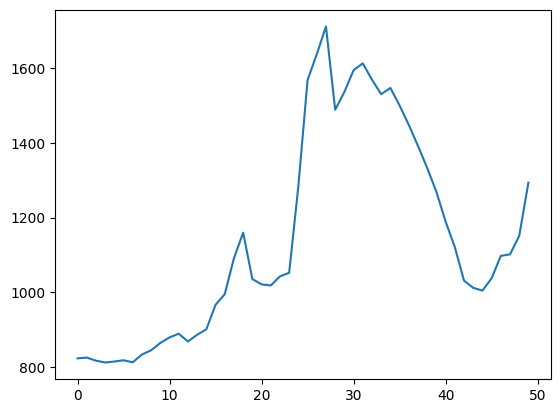

In [8]:
import matplotlib.pyplot as plt

plt.plot(errors)
plt.show()

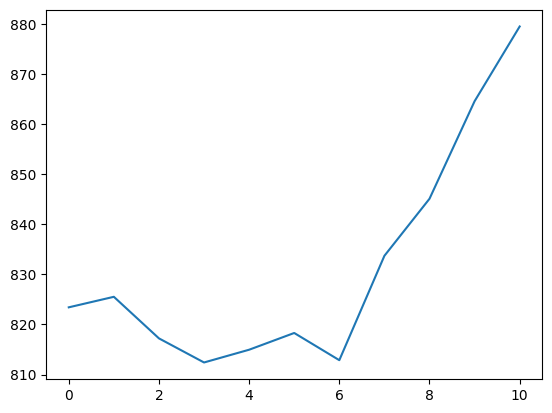

In [9]:
error_till_10 = errors[:11]
plt.plot(error_till_10)
plt.show()